In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Salary Distribution for Top 6 Data Science Job Positions in the United States

In [53]:
# Data
df_us = df[(df['job_country'] == "United States") & (df['salary_year_avg'].notna())].copy()
job_titles = df_us['job_title_short'].value_counts().sort_values(ascending=False).head(6).index.to_list()
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.to_list()

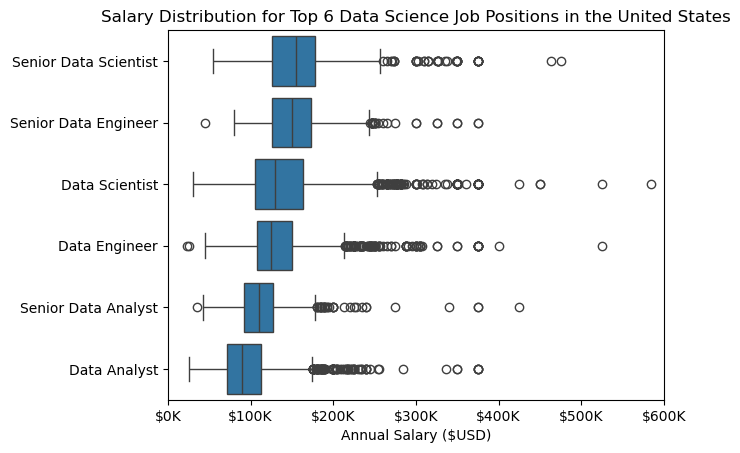

In [54]:
# Plot
from matplotlib.ticker import FuncFormatter
sns.boxplot(df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
plt.xlim((0,600_000))
plt.xlabel('Annual Salary ($USD)')
plt.ylabel("")
plt.title("Salary Distribution for Top 6 Data Science Job Positions in the United States")
plt.show()

### Median Salary vs Skill for Data Analyst

In [55]:
# Data
df_us_da = df[(df['job_country'] == "United States") & (df['job_title_short'] == 'Data Analyst') & (df['salary_year_avg'].notna())].copy()

In [57]:
df_us_da_skills = df_us_da.explode("job_skills")

In [66]:
df_us_da_group = df_us_da_skills.groupby('job_skills').agg(
    job_count=('job_title_short','count'),
    median_salary=('salary_year_avg','median')
    )

In [67]:
df_us_da_top_pay = (
  df_us_da_group
  .sort_values(by='median_salary',ascending=False)
  .head(10)
)

In [71]:
df_us_da_top_demand = (
  df_us_da_group
  .sort_values(by='job_count',ascending=False)
  .head(10)
).sort_values(by='median_salary',ascending=False)

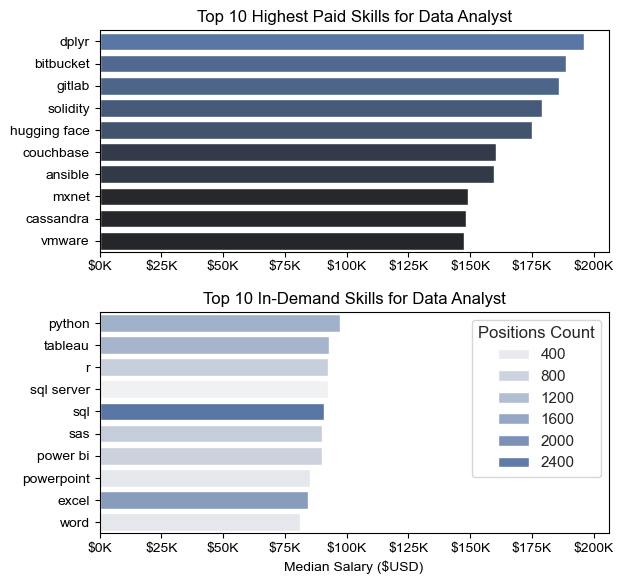

In [74]:
# Plot
from matplotlib.ticker import FuncFormatter

(fig, ax) = plt.subplots(2,1)
fig.set_figheight(6)

sns.set_theme(style="ticks")

sns.barplot(data=df_us_da_top_pay, x='median_salary', y=df_us_da_top_pay.index, legend=False, ax=ax[0], hue='median_salary', palette="dark:b")
sns.barplot(data=df_us_da_top_demand, x='median_salary', y=df_us_da_top_demand.index, ax=ax[1], hue='job_count', palette="light:b")

ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst")
ax[1].set_title("Top 10 In-Demand Skills for Data Analyst")

xlim = max([axis.get_xlim() for axis in ax])

for axis in ax:
  axis.set_xlim(xlim)
  axis.set_ylabel("")
  axis.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
  axis.set_xlabel("") 
  #axis.invert_yaxis()
  #axis.legend().set_visible(False)	

ax[1].legend(title='Positions Count')
ax[1].set_xlabel("Median Salary ($USD)")  

fig.tight_layout()
fig.subplots_adjust()
plt.show()

In [73]:
df_us_da_top_demand

,job_count,median_salary
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00
